In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mousedrug_df = pd.read_csv(mouse_drug_data_to_load)
clinicaltrial_df = pd.read_csv(clinical_trial_data_to_load)

pharma_df = pd.merge(clinicaltrial_df, mousedrug_df, on='Mouse ID').sort_values(by=['Timepoint', 'Drug']).reset_index(drop='True')

pharma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,j246,0,45.0,0,Capomulin
2,r554,0,45.0,0,Capomulin
3,s185,0,45.0,0,Capomulin
4,b742,0,45.0,0,Capomulin


## Tumor Response to Treatment

In [2]:
tumormean_df = pharma_df.groupby(['Drug', 'Timepoint']).mean().drop(columns='Metastatic Sites')

tumormean_df.head(30)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421
Infubinol 0                   45.000000
          5                   47.062001
          10                  49.403909
          15                  51.296397
          20                  53.197691
          25                  55.715252
          30                  58.299397
          35                  60.742461
          40                  63.162824
          45                  65.755562

In [3]:
tumorstderror_df = pharma_df.groupby(['Drug', 'Timepoint']).sem().drop(columns=['Mouse ID', 'Metastatic Sites'])

tumorstderror_df.head(30)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358
Infubinol 0                    0.000000
          5                    0.235102
          10                   0.282346
          15                   0.357705
          20                   0.476210
          25                   0.550315
          30                   0.631061
          35                   0.984155
          40                   1.055220
          45                   1.144427

In [4]:
tumormean_reformat_df = tumormean_df.reset_index().pivot(index = 'Timepoint', columns = 'Drug')

tumormean_reformat_df

Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [5]:
tumorstderror_reformat_df = tumorstderror_df.reset_index().pivot(index = 'Timepoint', columns = 'Drug')
tumorstderror_reformat_df

Tumor Volume (mm3)                                          \
Drug               Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   
Timepoint                                                              
0                   0.000000  0.000000  0.000000  0.000000  0.000000   
5                   0.448593  0.164505  0.235102  0.264819  0.202385   
10                  0.702684  0.236144  0.282346  0.357421  0.319415   
15                  0.838617  0.332053  0.357705  0.580268  0.444378   
20                  0.909731  0.359482  0.476210  0.726484  0.595260   
25                  0.881642  0.439356  0.550315  0.755413  0.813706   
30                  0.934460  0.490620  0.631061  0.934121  0.975496   
35                  1.052241  0.692248  0.984155  1.127867  1.013769   
40                  1.223608  0.708505  1.055220  1.158449  1.118567   
45                  1.223977  0.902358  1.144427  1.453186  1.416363   

                                                             
Drug        Placebo  Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                                    
0          0.000000  0.000000  0.000000  0.000000  0.000000  
5          0.218091  0.231708  0.482955  0.239862  0.188950  
10         0.402064  0.376195  0.720225  0.433678  0.263949  
15         0.614461  0.466109  0.770432  0.493261  0.370544  
20         0.839609  0.555181  0.786199  0.621889  0.533182  
25         1.034872  0.577401  0.746991  0.741922  0.602513  
30         1.218231  0.746045  0.864906  0.899548  0.800043  
35         1.287481  1.084929  0.967433  1.003186  0.881426  
40         1.370634  1.564779  1.128445  1.410435  0.998515  
45         1.351726  1.888586  1.226805  1.576556  1.003576

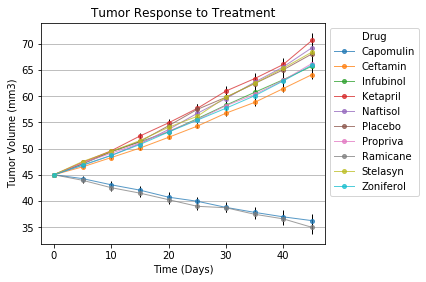

In [6]:
tumormean_reformat_df.plot(kind='line', marker='o', linewidth=1, markersize=4, alpha=0.75)
plt.errorbar(tumorstderror_df.reset_index()['Timepoint'], tumormean_df['Tumor Volume (mm3)'], yerr=tumorstderror_df['Tumor Volume (mm3)'], fmt='none', ecolor='black', elinewidth=1)
plt.grid(axis='y')
plt.legend(title='Drug', labels=list(tumormean_reformat_df.columns.levels[1]), bbox_to_anchor=(1,1), loc='upper left')
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout(pad=1)

plt.savefig('Submission_Images/treatment_submission.png')

plt.show()

## Metastatic Response to Treatment

In [7]:
metamean_df = pharma_df.groupby(['Drug', 'Timepoint']).mean().drop(columns='Tumor Volume (mm3)')

metamean_df.head(30)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308
Infubinol 0                  0.000000
          5                  0.280000
          10                 0.666667
          15                 0.904762
          20                 1.050000
          25                 1.277778
          30                 1.588235
          35                 1.666667
          40                 2.100000
          45                 2.111111

In [8]:
metastderror_df = pharma_df.groupby(['Drug', 'Timepoint']).sem().drop(columns=['Tumor Volume (mm3)', 'Mouse ID'])

metastderror_df.head(30)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101
Infubinol 0                  0.000000
          5                  0.091652
          10                 0.159364
          15                 0.194015
          20                 0.234801
          25                 0.265753
          30                 0.227823
          35                 0.224733
          40                 0.314466
          45                 0.309320

In [9]:
metamean_reformat_df = metamean_df.reset_index().pivot(index = 'Timepoint', columns = 'Drug')

metamean_reformat_df

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [10]:
metastderror_reformat_df = metastderror_df.reset_index().pivot(index = 'Timepoint', columns = 'Drug')
metastderror_reformat_df

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.074833  0.108588  0.091652  0.098100  0.093618  0.100947   
10                0.125433  0.152177  0.159364  0.142018  0.163577  0.115261   
15                0.132048  0.180625  0.194015  0.191381  0.158651  0.190221   
20                0.161621  0.241034  0.234801  0.236680  0.181731  0.234064   
25                0.181818  0.258831  0.265753  0.288275  0.185240  0.263888   
30                0.172944  0.249479  0.227823  0.347467  0.266667  0.300264   
35                0.169496  0.266526  0.224733  0.361418  0.330464  0.341412   
40                0.175610  0.289128  0.314466  0.315725  0.321702  0.297294   
45                0.202591  0.286101  0.309320  0.278722  0.351104  0.304240   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.095219  0.066332  0.087178  0.077709  
10         0.105690  0.090289  0.123672  0.109109  
15         0.136377  0.115261  0.153439  0.111677  
20         0.171499  0.119430  0.200905  0.166378  
25         0.199095  0.119430  0.219824  0.236621  
30         0.266469  0.139968  0.230641  0.248168  
35         0.366667  0.145997  0.240983  0.285714  
40         0.433903  0.160591  0.312815  0.299791  
45         0.428571  0.190221  0.359062  0.286400

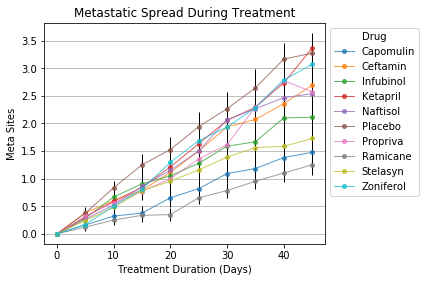

In [11]:
metamean_reformat_df.plot(kind='line', marker='o', linewidth=1, markersize=4, alpha=0.75)
plt.errorbar(metastderror_df.reset_index()['Timepoint'], metamean_df['Metastatic Sites'], yerr=metastderror_df['Metastatic Sites'], fmt='none', ecolor='black', elinewidth=1)
plt.grid(axis='y')
plt.legend(title='Drug', labels=list(metamean_reformat_df.columns.levels[1]), bbox_to_anchor=(1,1), loc='upper left')
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Meta Sites')
plt.tight_layout(pad=1)

plt.savefig('Submission_Images/spread_submission.png')

plt.show()

## Survival Rates

In [12]:
micecount_df = pharma_df.groupby(['Drug', 'Timepoint']).count().drop(columns=['Tumor Volume (mm3)', 'Metastatic Sites']).rename(columns={'Mouse ID':'Mouse Count'})

micecount_df.head(30)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18
          25                  18
          30                  16
          35                  14
          40                  14
          45                  13
Infubinol 0                   25
          5                   25
          10                  21
          15                  21
          20                  20
          25                  18
          30                  17
          35                  12
          40                  10
          45                   9

In [13]:
micecount_reformat_df = micecount_df.reset_index().pivot(index = 'Timepoint', columns = 'Drug')

micecount_reformat_df

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   
25                 22       18        18       19       18      17       14   
30                 22       16        17       18       15      15       13   
35                 22       14        12       17       15      14       10   
40                 21       14        10       15       15      12        9   
45                 21       13         9       11       13      11        7   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17  
25              23       19        16  
30              23       18        15  
35              21       16        14  
40              20       12        14  
45              20       11        14

In [14]:
micecount_percent_df = micecount_reformat_df.copy().rename(columns={'Mouse Count':'Mouse Percentage'})
for col in list(micecount_percent_df.columns):
    micecount_percent_df[[col]] = micecount_percent_df[[col]] / micecount_percent_df[[col]].max() * 100

micecount_percent_df

Mouse Percentage                                               \
Drug             Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo   
Timepoint                                                                 
0                    100.0    100.0     100.0    100.0    100.0   100.0   
5                    100.0     84.0     100.0     92.0     92.0    96.0   
10                   100.0     80.0      84.0     88.0     84.0    96.0   
15                    96.0     76.0      84.0     76.0     84.0    80.0   
20                    92.0     72.0      80.0     76.0     80.0    76.0   
25                    88.0     72.0      72.0     76.0     72.0    68.0   
30                    88.0     64.0      68.0     72.0     60.0    60.0   
35                    88.0     56.0      48.0     68.0     60.0    56.0   
40                    84.0     56.0      40.0     60.0     60.0    48.0   
45                    84.0     52.0      36.0     44.0     52.0    44.0   

                                                      
Drug         Propriva Ramicane    Stelasyn Zoniferol  
Timepoint                                             
0          100.000000    100.0  100.000000     100.0  
5           96.153846    100.0   96.153846      96.0  
10          88.461538     96.0   88.461538      88.0  
15          65.384615     96.0   88.461538      84.0  
20          65.384615     92.0   80.769231      68.0  
25          53.846154     92.0   73.076923      64.0  
30          50.000000     92.0   69.230769      60.0  
35          38.461538     84.0   61.538462      56.0  
40          34.615385     80.0   46.153846      56.0  
45          26.923077     80.0   42.307692      56.0

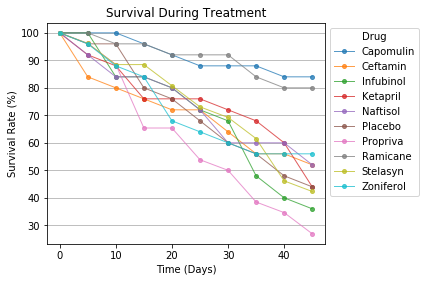

In [15]:
micecount_percent_df.plot(kind='line', marker='o', linewidth=1, markersize=4, alpha=0.75)
plt.grid(axis='y')
plt.legend(title='Drug', labels=list(micecount_percent_df.columns.levels[1]), bbox_to_anchor=(1,1), loc='upper left')
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.tight_layout(pad=1)

plt.savefig('Submission_Images/survival_submission.png')

plt.show()

## Summary Bar Graph

In [16]:
change_list = []
for col in list(tumormean_reformat_df.columns):
    change_list.append((tumormean_reformat_df[col][45] - tumormean_reformat_df[col][0])/tumormean_reformat_df[col][0] * 100)
change_df = pd.DataFrame({'Drug':tumormean_reformat_df.columns.levels[1],
                          'Percent Change':change_list}).set_index('Drug')

change_df

,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347
Placebo,51.297960
Propriva,47.241175
Ramicane,-22.320900
Stelasyn,52.085134


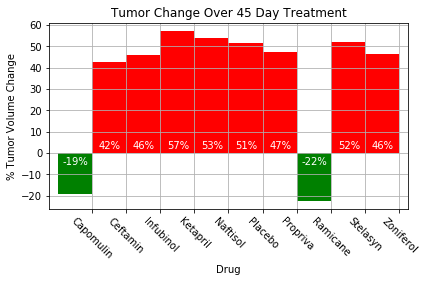

In [17]:
change_stack = change_df.stack()
mask = change_stack < 0
colors = np.array(['r']*len(change_stack))
colors[mask.values] = 'g'

change_stack.plot(kind='bar', rot=315, color=colors, width=-1, align='edge', grid=True)
plt.xticks(np.arange(len(change_df)), list(change_df.index))
plt.xlim(-1.25, len(change_df)-0.75)
for i in range(len(change_df)):
    if (change_list[i] < 0):
        plt.text(x=np.arange(len(change_df))[i]-0.85, y=-5.5, s=f"{int(change_list[i])}%", size=10, color='w')
    else:
        plt.text(x=np.arange(len(change_df))[i]-0.8, y=2, s=f"{int(change_list[i])}%", size=10, color='w')
plt.title('Tumor Change Over 45 Day Treatment')
plt.xlabel('Drug')
plt.ylabel('% Tumor Volume Change')
plt.tight_layout(pad=1)

plt.savefig('Submission_Images/change_submission.png')

plt.show()